# Assignment I
*Digital Signal Processing, Innopolis University*

Author: **Artem Bakhanov** [a.bahanov@innopolis.university](mailto:a.bahanov@innopolis.university)

## Libraries and imports

**Important!**

Please run the cell below only if you work in my Docker Container

In [1]:
# run this only if you work in my docker container

import os
import numpy as np
print("WD was: ", os.getcwd())
print("Now working in /content directory")
os.chdir("/content")

WD was:  /content/notebooks
Now working in /content directory


**Next cells can be run safely**

In [2]:
from ADC_simulator import ADC
import numpy as np
from numpy import fft
from matplotlib import pyplot as plt
from IPython.display import Audio

## Reading data and choosing sampling paramaters

Here I just selected 32k, it sounds OK

For quantization level I selected the smallest power of 2 to sound more or less good.

In [3]:
v = 5 # student number from 1 to 14 (ask your TA to get it)
fs = 32000 # samples per second
samples = fs * 3 # number of samples to acquire

quant_levels = np.linspace(-1, 1, 512)

# Sound recording
recorded_samples = ADC.rec(v, samples, quant_levels, fs)

In [4]:
Audio(recorded_samples,rate=fs)

We can hear some strange and simple noise.

## Finding the offset of the amplitude

In [5]:
mean = np.mean(recorded_samples)
mean

-0.10439457265179064

Let us adjust the mean:

In [6]:
recorded_samples -= np.mean(recorded_samples)

In [7]:
Audio(recorded_samples,rate=fs)

## FFT

In [8]:
sp = fft.fft(recorded_samples)
freq = np.fft.fftfreq(len(sp)) * fs

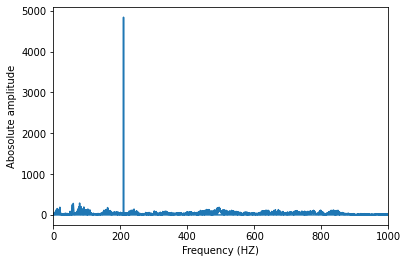

In [9]:
plt.plot(freq, np.abs(sp))
plt.xlabel("Frequency (HZ)")
plt.ylabel("Abosolute amplitude")
plt.xlim(0, 1000)
plt.show()

As we can see on the graph, there is one very high peak.

Since we are given an audio with sine noise, it means that this peak represents it with very high probability.

In [10]:
peak = np.argmax(np.abs(sp))
noise_phase = np.angle(sp[peak])
noise_A = 2 * np.abs(sp[peak]) / len(sp)
noise_freq = freq[peak]

print(f"Noise phase: {noise_phase}")
print(f"Noise amplitude: {noise_A}")
print(f"Noise frequency (HZ): {noise_freq}")

Noise phase: -1.550517772625204
Noise amplitude: 0.1006564989814615
Noise frequency (HZ): 209.67238689547582


In [11]:
noise_step = 2 * np.pi * noise_freq / fs
samples = np.arange(0, len(recorded_samples)) * noise_step
noise_sine = noise_A * np.cos(samples + noise_phase)

In [12]:
samples.shape

(96150,)

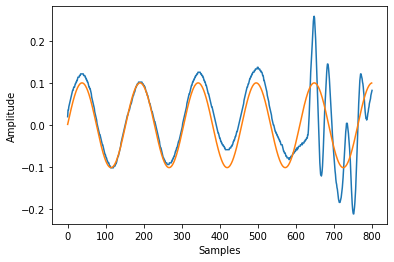

In [13]:
period_num = 5 * 160
plt.plot(np.linspace(0, period_num, period_num), recorded_samples[:period_num], noise_sine[:period_num])
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

One can see here, that in period of silence there is a sine wave. 

If we take the sine wave with the parameters calculated above it will be almost the same!

Let us simply subtract our sine wave from the recorded samples and let see what we get.

In [14]:
Audio(recorded_samples - noise_sine, rate=fs)

**There is no sine noise that was easily heard before!**

## Bonus task

In [15]:
from scipy.interpolate import interp1d

In [17]:
def remove_sine_noise(audio, fs):
    sp = fft.fft(audio)
    freq = np.fft.fftfreq(len(sp)) * fs
    
    peak = np.argmax(np.abs(sp))
    noise_phase = np.angle(sp[peak])
    noise_A = 2 * np.abs(sp[peak]) / len(sp)
    noise_freq = np.abs(freq[peak])
    
    noise_step = 2 * np.pi * noise_freq / fs
    samples = np.arange(0, len(audio)) * noise_step
    noise_sine = noise_A * np.cos(samples + noise_phase)
    
    return audio - noise_sine

In [18]:
full_audio = np.array([])
fss = [0, 32000, 21500, 32000, 22000, 32000, 32000, 32000, 23000, 23000, 23000, 32000, 32000, 22000, 32000]
main_fs = 32_000
size = 5
main_t = np.linspace(0, size, size * main_fs)
quant_levels = np.linspace(-1, 1, 512)

for i in range(1, 15):
    fs = fss[i]
    samples = fs * size
    recorded_samples = ADC.rec(i, samples, quant_levels, fs)
    recorded_samples -= np.mean(recorded_samples)
    
    no_noise = remove_sine_noise(recorded_samples, fs)
    t = np.linspace(0, size, len(recorded_samples))
    interpolated = interp1d(t, no_noise)(main_t)
    full_audio = np.concatenate((full_audio, interpolated))
    

In [19]:
Audio(full_audio, rate=32000)

This is “Alone” written 
by Edgar Allan Poe.

https://www.poetryfoundation.org/poems/46477/alone-56d2265f2667d

In [ ]:
# just testing fs's

fs = 22000 # samples per second
samples = fs * 4 # number of samples to acquire

quant_levels = np.linspace(-1, 1, 512)

# Sound recording
recorded_samples = ADC.rec(2, samples, quant_levels, fs)

Audio(recorded_samples, rate=fs)